# Time-dependent Quantum Mechanics and Spectroscopy

## 2023 assignment

This assignment is formed of two parts. In part 1 the goal is to generate a spectrum from first principles given detailed information about the system. In part 2 the goal is to infer information about a system given time-resolved experimental data.

You need to write a report including both parts of the assignment to be submitted via Turnitin. There is a word count limit on the report of 2000 words (with a 10% tolerance), excluding captions, titles and references. Each part of the assignment is worth 50%. The deadline for submission is May 10th at 18:00.

The main goal of the assignment *is not* to simply complete the task, but to be able to demonstrate your understanding of how the different concepts are related and how the result is obtained.

## Part 1

(Atomic units are used throughout this section.)

The main goal of this part of the assignment is to study the Schumann-Runge band of the <sup>16</sup>O<sub>2</sub> spectrum, due to transitions from the X<sup>3</sup>&Sigma;<sub>g</sub><sup>-</sup> ground electronic state to the B<sup>3</sup>&Sigma;<sub>u</sub><sup>-</sup> excited state. This band is responsible for a good part of the UV radiation absorption in the Earth's atmosphere, and in this way it shaped the evolution of life on this planet.

We will consider the following potential energy curves of the two states involved shown below.



The potential energy curves for each state are represented by the Varshni potential:
$$V(x)=D_e \left(1-\frac{r_e}{x}e^{-\beta(x^2-r_e^2)}\right)^2+T_e.$$


The potential parameters used for each state are:

||X <sup>3</sup>&Sigma;<sub>g</sub><sup>-</sup>|B <sup>3</sup>&Sigma;<sub>u</sub><sup>-</sup>|
|----------------------------------|---------|---------|
|D<sub>e</sub>/E<sub>h</sub>       |0.19158  |0.03342  |
|r<sub>e</sub>/a<sub>0</sub>       |2.29716  |3.03150  |
|&beta;/a<sub>0</sub><sup>-2</sup> |0.21098  |0.19459  |
|T<sub>e</sub>/E<sub>h</sub>       |0.10     |0.327    |

We will consider that the wavefunction of the system in the ground state is the lowest eigenstate of the harmonic oscillator with a force constant consistent with the ground state potential $k=\left.\frac{d^2 V}{d x^2}\right|_{x=r_e}$, which in this case is $k=2 D_e^X\left(\frac{1}{r_e^X}+2 \beta^X r_e^X \right)^2$.

We will also consider that the transition dipole moment &mu;<sub>XB</sub> between the two electronic states dependence on the inter-atomic distance is given by the following python function:

    import numpy as np

    def transition_dipole_moment(x):
        '''Transition dipole moment dependence on the inter-atomic
        coordinate x for the O2 electronic transition.
        The input x, and the output of the function are in atomic units.'''

        #parameters for connecting function
        ss=2
        es=2.28
        plateau=0.266
        peak=0.94

        #step function of order 7 (n=3)
        xs=(x-ss)/(es-ss)
        step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
        step= plateau + (peak-plateau)*step

        #exponential decay for higher x values
        decay=3.85*np.exp(-0.626*x)

        return np.where(x<ss,plateau,np.where(x>es,decay,step))

The accompanying file [qdyn.py](qdyn.py) includes the Python functions `propagator()` and `animate_dynamics()`. The former implements the time-evolution operator for a system given an arbitrary potential, 

$$\varphi(x,t_0+\Delta t)=e^{-i \hat{H} \Delta t}\varphi(x,t_0),$$

while the latter can be used to display the evolution of the wavefunction of the system with time. Refer to the functions' documentation for details on their use.

### Discussion points to include in the report

#### Describe how your spectrum was obtained

#### Analyse the vibronic spectrum and relate it to the dynamics of the system

In describing the dynamics you can include a qualitative description of how the wavefunction changes with time and how this relate to the spectrum. In the case we are studying, it is interesting to consider the main dynamics features, but also the details of the dynamics inside the excited state potential well.

You can also try to be more quantitative, using results that you have obtained (i.e. autocorrelation function) or explicitly calculated in your analysis. You could look for example at how the expectation value of the position changes with times; or how the spread in positions changes in time.

#### Eigenstates of the excited state curve

For reasons that may become apparent as you perform your simulations, it is quite challenging to calculate a well resolved absorption spectrum of the O<sub>2</sub> Schumann-Runge band. If you do manage to obtain a well resolved spectrum, identify the most intense vibronic peak corresponding to a transition to a bound state on the excited state potential, and the energy of the final state.

With that information, and from the dynamics you simulate, it is possible to obtain the vibrational eigenfunction of that state: if the time-dependent Schrödinger equation is solved, one can find the solutions of the time-independent Schrödinger equation. (D. J. Tannor, *Introduction to Quantum Mechanics: a time-dependent perspective*, University Science Books, 2007, section 6.3.) To see this we first expand the nuclear wavefunctions of the excited state curve at time t<sub>0</sub> &phi;<sup>B</sup>(x,t<sub>0</sub>), as a function of the, as of now unknown but existing, eigenstates of that curve &Lambda;<sub>v</sub><sup>B</sup>(x):

$$\varphi^B(x,t_0)=\sum_i c_i \Lambda_i^B(x).$$

If we apply the excited state time-evolution operator to both sides of this expression (remember &hbar;=1), we get:

$$e^{-i \hat{H}^B (t-t_0)} \varphi^B(x,t_0)=e^{-i \hat{H}^B (t-t_0)}\sum_i c_i \Lambda_i^B(x) \Leftrightarrow \varphi^B(x,t)=\sum_i c_i e^{-i E_i^B t}\Lambda_i^B(x).$$

By multiplying both sides of the equality by $e^{i E_v^B t}$ where $E_v^B$ is an eigenvalue of a specific eigenstate, and integrate over time:

$$\int_{-\infty}^{\infty}e^{i E_v^B t} \varphi^B(x,t) dt= \sum_i c_i \int_{-\infty}^{\infty}e^{i (E_v^B-E_i^B) t} \Lambda_i^B(x) dt = 2 \pi \sum_i c_i \delta(E_v^B-E_i^B) \Lambda_i^B(x) \propto \Lambda_v^B(x).$$

The left-hand side of the equation can be calculated from the dynamics, the right-hand side is our unknown.

Plot the vibrational eigenfunction of the excited state potential corresponding to the most intense vibronic peak corresponding to a transition to a bound state on the excited state potential, and report on its quantum number.

For this technique to work, one needs an accurate estimate of the energy the final state determined from a very well resolved absorption spectrum. If you struggle to obtain a resolved spectrum, you can use alternative techniques to obtain a sufficiently accurate energy of an eigenfunction of your choice on the excited state potential, and describe the procedure you followed to obtain it.

For the eigenfunction you have obtained, estimate the Franck-Condon factor for the transition starting from the ground vibrational state on the ground state. Compare this value to that of the v'=0 &rarr; v''=0 transition. You can consider that the ground vibrational state wavefunction for each electronic state is well approximated by an harmonic oscillator eigenfunction.

### Technical tips

* To make sure you have defined the functions for the potential correctly, start by plotting them to reproduce the figure above.
* Overlap the plot of your initial wavefunction and the transition dipole moment with your potential curves, to make sure these are defined correctly.
* In order to obtain valid results it is critical to set up an adequate grid of space points. The grid should be fine enough to describe high momentum components of the wavefunction. You should set the limits of the grid such that the wavefunction remains equal to zero at the limits of the grid throughout all the simulation to avoid artefacts. Check that this is the case before doing any further calculations.
* The time-step should be small enough to propagate the wavefunction correctly. But a too small time-step may require too many steps to be taken, and depending on how fine is your space grid this may need greater memory resources than those available in the computer you are using. Make tests with short runs, and simulate for longer times when needed.

In [1]:
import numpy as np
from numpy.fft import fft,ifft,fftshift,ifftshift

import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate_dynamics(x,dyn,dt,V_array,magnitude=True,real=True,imaginary=False,V_ylim=(0,1),psi_ylim=(-1,1),frame_delay=100,blit=True,**options):
    """Generate an animation of the wavefunction evolving with time overlaped with the potential.
    
    Mandatory arguments
    x: 1D array of equally spaced points in space.
    dyn: 2D array with wavefunction values at several instants in time.
    dt: time step in atomic units.
    V_array: 1D array with the values of the potential a the points x.
    
    Optional keyword arguments
    magnitude = bool: show magnitude of the wavefunction (default:True).
    real = bool: show real part of the wavefunction (default=True).
    imaginary = bool: show imaginary part of the wavefunction (default=False).
    V_ylim = (num,num): set y axis limits for the potential plot.
    psi_ylim = (num,num): set y axis limits for the wavefunction plot.
    frame_delay = num: set the delay between frames in milliseconds (default:200).
    blit = bool: Try setting to False if you see glittches in your animation (default:True).
    
    Any other keywords will be passed as plot options (you can use for example
    xlim=(num,num)).
    """
    
    fig=plt.figure()
    #create axes for potential plot
    potplot=plt.gca()
    potplot.plot(x,V_array,color="gray")
    potplot.set(xlabel="$x/a_0$",ylabel="$V/E_h$",ylim=V_ylim,**options)

    # create another axes set for the wavefunction sharing the x axis
    psiplot=potplot.twinx()
    psiplot.set(ylabel="$\\psi$",ylim=psi_ylim,**options)
    if magnitude:
        mag_plot,=psiplot.plot((),(),color="black",label="$|\\Psi|$")
    if real:
        re_plot,=psiplot.plot((),(),color="blue",label="$Re(\\Psi)$")
    if imaginary:
        im_plot,=psiplot.plot((),(),color="red",label="$Im(\\Psi)$")
    stext=psiplot.text(0.1,0.9,"t=0au",transform = psiplot.transAxes)
    plt.legend(loc="upper right")
    
    def dyn_plot(step,sim_array,dt):
        stext.set_text("t="+str(step*dt)+"au")
        output=[stext]
        if magnitude:
            mag_plot.set_data(x,np.abs(sim_array[step]))
            output.append(mag_plot)
        if real:
            re_plot.set_data(x,np.real(sim_array[step]))
            output.append(re_plot)
        if imaginary:
            im_plot.set_data(x,np.imag(sim_array[step]))
            output.append(im_plot)
        return tuple(output)

    return animation.FuncAnimation(fig,dyn_plot,frames=len(dyn),interval=frame_delay,fargs=(dyn,dt),blit=blit)

def kinetic_prop(psi_x,m,dx,dt):
    """Calculate the kinetic part of the split-operator propagator: e**(-j*K*dt),
    where K is the kinetic energy operator.
    
    Arguments
    psi_x: array with wavefunction on which the propagator is operating.
           It has the values of the wavefunction in a 1D space grid.
    m: mass of the system.
    dx: spacing of the points in the space grid.
    dt: time step.
    
    The function works by doing the Fourier transform of psi_x, applying K on the
    momentum representation and transforming back via inverse Fourier transform.
    """
    
    # Fourier transform the entry vector
    psi_k=fftshift(fft(psi_x,norm="ortho"))
    
    # calculate resolution in k
    n=len(psi_x)
    dk=2*np.pi/(n*dx)
    
    # operate the exponential kinetic operator on psi_k
    k_sq=(np.linspace(np.floor(-n/2+1),int(n/2),n)*dk)**2
    expK_k=np.exp(-1j*(k_sq*dt)/(2*m))
    
    prop_psi_k=expK_k*psi_k
    
    # transform back to space representation
    prop_psi_x=ifft(ifftshift(prop_psi_k),norm="ortho")
    
    return prop_psi_x

def propagator(x_grid,psi,m,dt,V_func,*args):
    """Propagate the 1D wavefunction over one time step.
    
    Arguments
    x_grid: array with a 1D grid of equally spaced points in space.
    psi: array with the values of the wavefunction in x_grid.
    m: the mass of the system.
    dt: the time step.
    V_func: the name of the function that defines the potential
    *args: if V_func(x_grid,a,b) requires for example 2 parameters
           a and b besides the position x_grid, these should be passed
           in order after the function name.
           
    The function implements a split-operator procedure in a
    Fourier pseudospectral basis.
    """
    
    # set potential part of the propagator
    expV=np.exp(-1j*V_func(x_grid,*args)*dt/2)
    
    # operate with potential part first
    psi2=expV*psi
    
    # operate with kinetic part
    psi3=kinetic_prop(psi2,m,x_grid[1]-x_grid[0],dt)
    
    # operate with potential part again
    psi4=expV*psi3
    
    return psi4

In [2]:
import numpy as np

def transition_dipole_moment(x):
    '''Transition dipole moment dependence on the inter-atomic
    coordinate x for the O2 electronic transition.
    The input x, and the output of the function are in atomic units.'''

    #parameters for connecting function
    ss=2
    es=2.28
    plateau=0.266
    peak=0.94

    #step function of order 7 (n=3)
    xs=(x-ss)/(es-ss)
    step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
    step= plateau + (peak-plateau)*step

    #exponential decay for higher x values
    decay=3.85*np.exp(-0.626*x)

    return np.where(x<ss,plateau,np.where(x>es,decay,step))

transition_dipole_moment(12)

array(0.00210398)

## Part 2

A range of modern lighting and display technologies relies on colour conversion layers (CCLs), which enable the efficient conversion of light from shorter to longer wavelengths.

The newly developed optical material for CCL has been studied through spectroscopic analysis. The material was a transparent and chemically stable polyvinylcarbazole (PVK) film doped with two fluorescent dyes, BV440 and Atto505. The doping concentration for each dye was kept relatively low, less than 1% by weight. Additionally, both dyes were characterized through absorption and photoluminescence spectroscopies conducted under steady-state conditions. No phosphorescence or sample degradation effects were observed during the measurements.

The spectroscopic data are provided to you as ASCII files with space-separation between numbers.  Data set includes:

* Separately measured [absorption spectrum of BV440](Abs-BV440) (first column – wavelength (nm), second - optical density (OD))
* Separately measured [absorption spectrum of Atto505](Abs-Atto505) (first column - wavelength, second - OD)
* Separately measured [fluorescence spectrum of BV440](Fluorescence-BV440) (first column - wavelength, second – photon counts in arb.u.)
* Separately measured [fluorescence spectrum of Atto505](Fluorescence-Atto505) (first column - wavelength, second – photon counts in arb.u.)
* [Transient absorption spectrum](TA_2D-DATA.mx3) of the studied material (BV440 and Atto505 dopped PVK) after excitation at 370nm (2D matrix; the first column contains pump-probe delay times (ps) and the first row contains probe wavelengths; matrix elements show the change in transmission dT/T at the corresponding time/wavelength)

Your task is to analyse the experimental dataset and present a report addressing the following questions:

1. Identify excited states involved in the photochemistry and spectroscopy of the material. Propose a Jablonski diagram showing key processes happening in the material. When possible, specify the energies of excited states
2. Discuss and interpret cross-sections through transient absorption spectrum at (at least) two representative times and two representative wavelengths
3. Analyse the dynamics of the excited states and extract the timescale(s) of the dynamics using additional information provided by SVD or global fitting. Relate the identified timescales to the relevant dynamical processes on the Jablonski diagram proposed above.
4. Where possible, identify the vibrational modes of BV440 and Atto505 (use multiple approaches if you can). Assign the observed vibrational coherences (if any) to the electronic states.

Please support your analysis with the figures and references to the relevant theoretical background.

In [1]:
import serial
import serial.tools.list_ports
import time
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


Max Absorbance is at wavlength 503.13 nm


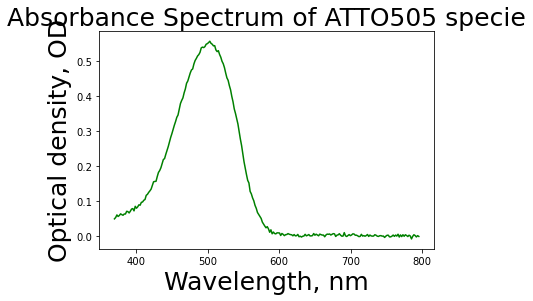

In [2]:
file1 = open("Abs-Atto505", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs1 = all_abs
combine_abs = all_abs

plot(all_wl,all_abs1,color = 'green')
xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of ATTO505 specie', fontsize = 25)
max(all_abs1)
a = all_abs1.index(max(all_abs1))
print('Max Absorbance is at wavlength '+str(round(all_wl[a],2))+ ' nm')

Max Absorbance is at wavlength 451.93 nm


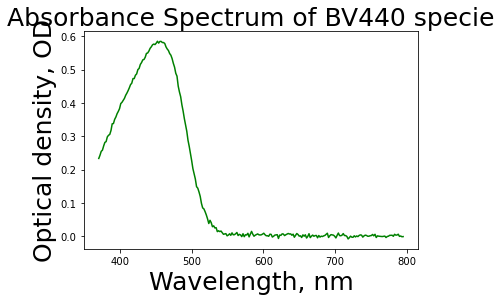

In [3]:
file1 = open("Abs-BV440", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs2 = all_abs
#combine_abs = all_abs

plot(all_wl,all_abs2,color = 'green')
xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of BV440 specie', fontsize = 25)
max(all_abs2)
a = all_abs2.index(max(all_abs2))
print('Max Absorbance is at wavlength '+str(round(all_wl[a],2))+ ' nm')

NameError: name 'combine_abs_a' is not defined

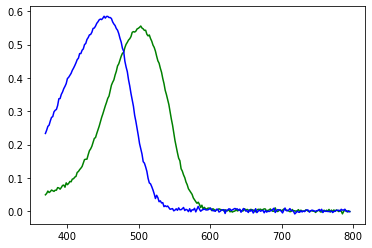

In [4]:
plot(all_wl,all_abs1,color = 'green')
plot(all_wl,all_abs2,color = 'blue')
plot(all_wl,combine_abs_a, color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of BV440, ATTO505 specie, and their mixture', fontsize = 20)

max(all_abs1)
a = all_abs1.index(max(all_abs1))
tx = 'Max Absorbance for ATTO505 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'green', linestyle ='--', label = tx)

max(all_abs2)
a = all_abs2.index(max(all_abs2))
tx = 'Max Absorbance for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'blue', linestyle ='--', label = tx)

max(combine_abs_a)
a = where(combine_abs_a== max(combine_abs_a))[0][0]
tx = 'Max Absorbance for mixed material is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)

legend()

In [ ]:
plot(all_wl,all_abs1,color = 'green')
plot(all_wl,all_abs2,color = 'blue')
#plot(all_wl,combine_abs_a, color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of BV440, ATTO505 specie', fontsize = 20)

max(all_abs1)
a = all_abs1.index(max(all_abs1))
tx = 'Max Absorbance for ATTO505 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'green', linestyle ='--', label = tx)

max(all_abs2)
a = all_abs2.index(max(all_abs2))
tx = 'Max Absorbance for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'blue', linestyle ='--', label = tx)

#max(combine_abs_a)
#a = where(combine_abs_a== max(combine_abs_a))[0][0]
#tx = 'Max Absorbance for mixed material is at '+str(round(all_wl[a],2))+ ' nm'
#axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)

legend()

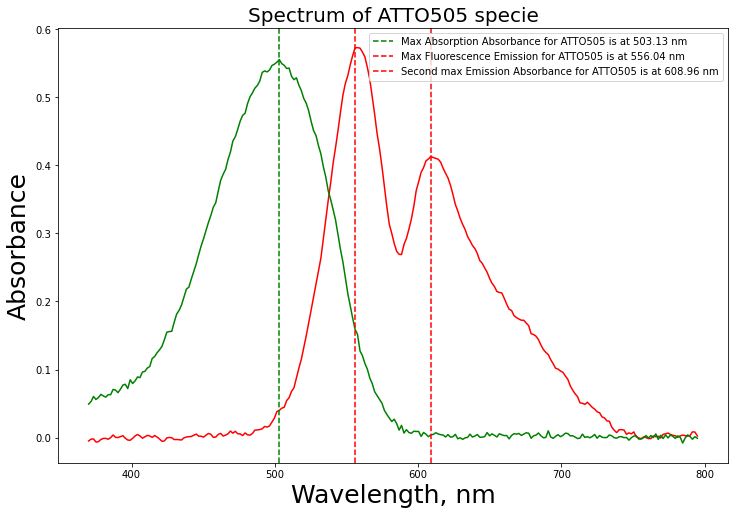

In [129]:
file1 = open("Fluorescence-Atto505", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs3 = all_abs



file1 = open("Fluorescence-BV440", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs4 = all_abs
combine_abs_f = array(all_abs3)+array(all_abs4)


plot(all_wl,all_abs3,color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Absorbance', fontsize = 25) 
title('Spectrum of ATTO505 specie', fontsize = 20)


plot(all_wl,all_abs1,color = 'green')
#plot(all_wl,all_abs2,color = 'blue')
#plot(all_wl,combine_abs_a, color = 'red')


max(all_abs1)
aa = all_abs1.index(max(all_abs1))
tx = 'Max Absorption Absorbance for ATTO505 is at '+str(round(all_wl[aa],2))+ ' nm'
axvline(all_wl[aa], color = 'green', linestyle ='--', label = tx)






max(all_abs3)
a = all_abs3.index(max(all_abs3))
tx = 'Max Fluorescence Emission for ATTO505 is at '+str(round(all_wl[a],2))+ ' nm'
b = all_abs3.index(max(all_abs3[130:]))
tx2 = 'Second max Emission Absorbance for ATTO505 is at '+str(round(all_wl[b],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)
axvline(all_wl[b], color = 'red', linestyle ='--', label = tx2)
legend()

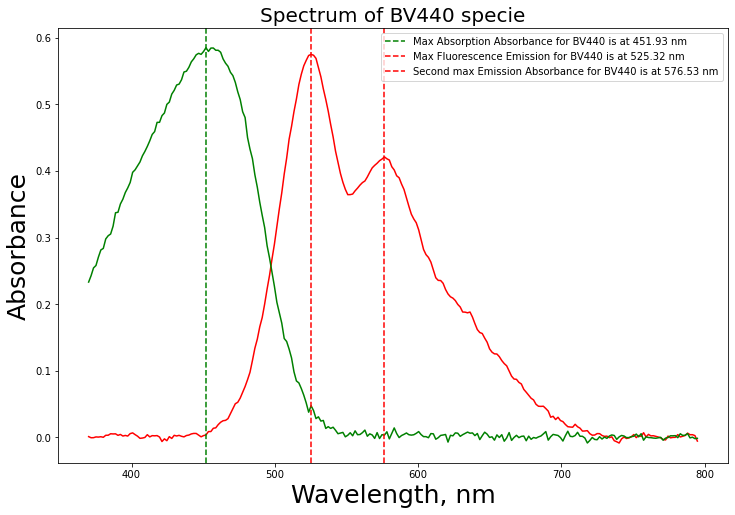

In [130]:
file1 = open("Fluorescence-Atto505", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs3 = all_abs



file1 = open("Fluorescence-BV440", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs4 = all_abs
combine_abs_f = array(all_abs3)+array(all_abs4)


plot(all_wl,all_abs4,color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Absorbance', fontsize = 25) 
title('Spectrum of BV440 specie', fontsize = 20)


plot(all_wl,all_abs2,color = 'green')
#plot(all_wl,all_abs2,color = 'blue')
#plot(all_wl,combine_abs_a, color = 'red')


max(all_abs2)
aa = all_abs2.index(max(all_abs2))
tx = 'Max Absorption Absorbance for BV440 is at '+str(round(all_wl[aa],2))+ ' nm'
axvline(all_wl[aa], color = 'green', linestyle ='--', label = tx)






max(all_abs4)
a = all_abs4.index(max(all_abs4))
tx = 'Max Fluorescence Emission for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
b = all_abs4.index(max(all_abs4[110:]))
tx2 = 'Second max Emission Absorbance for BV440 is at '+str(round(all_wl[b],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)
axvline(all_wl[b], color = 'red', linestyle ='--', label = tx2)
legend()

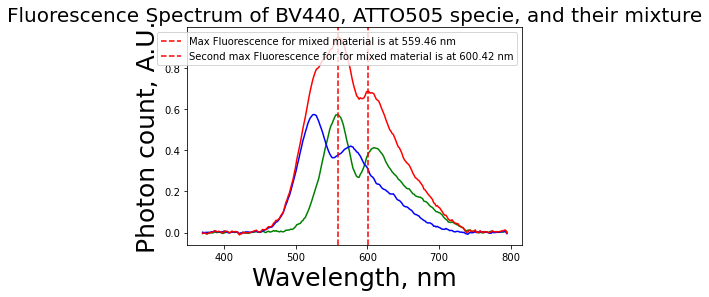

In [6]:
plot(all_wl,all_abs3,color = 'green')
plot(all_wl,all_abs4,color = 'blue')
plot(all_wl,combine_abs_f, color = 'red')


xlabel('Wavelength, nm', fontsize = 25)
ylabel('Photon count, A.U.', fontsize = 25) 
title('Fluorescence Spectrum of BV440, ATTO505 specie, and their mixture', fontsize = 20)
#axvline(all_wl[a], color = 'blue', linestyle ='--', label = tx)

max(combine_abs_f)
a = where(combine_abs_f== max(combine_abs_f))[0][0]
tx = 'Max Fluorescence for mixed material is at '+str(round(all_wl[a],2))+ ' nm'
#axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)

b = where(combine_abs_f== max(combine_abs_f[130:]))[0][0]
tx2 = 'Second max Fluorescence for for mixed material is at '+str(round(all_wl[b],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)
axvline(all_wl[b], color = 'red', linestyle ='--', label = tx2)

legend()

In [7]:
plot(all_wl,combine_abs_f+combine_abs_a, color = 'yellow')
plot(all_wl,all_abs1, color = 'red')
plot(all_wl,all_abs2, color = 'blue')
plot(all_wl,all_abs3, color = 'purple')
plot(all_wl,all_abs4, color = 'green')

NameError: name 'combine_abs_a' is not defined

In [8]:
file1 = open("TA_2D-DATA.mx3", "r")
all_row = []
while True:
    oneline = file1.readline()
    one_row = []
    if oneline == '':
        break
    onerow = oneline.split()
    for item in onerow:
        one_row.append(float(item))        
    all_row.append(one_row)
    
#print(len(all_row))

column = array(all_row)[:, [0]].tolist()
wavelength = all_row[:][0]
len(all_row[1])
del(wavelength[0])
del(column[0])
del(all_row[0])
i=0
while i<len(all_row):
    del(all_row[i][0])
    i=i+1

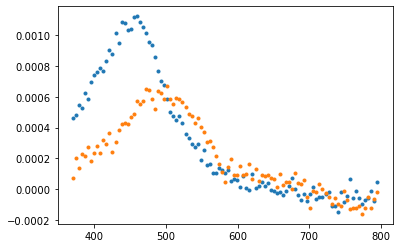

In [9]:
plot(wavelength,all_row[850],linestyle = '', marker = '.')
plot(wavelength,all_row[2000],linestyle = '', marker = '.')

In [10]:
column[875]

[0.125]

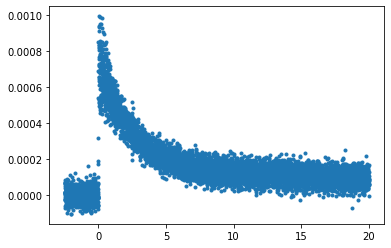

In [11]:
time = array(all_row)[:,10]
ti = time.tolist()
plot(column,ti,linestyle = '', marker = '.')

In [12]:
len(x)

NameError: name 'x' is not defined

In [13]:
len(all_row[0])

101

In [14]:
x,y = meshgrid(wavelength,column)
levels = linspace(-0.0004,0.0014,1000)

Text(0.5, 1.0, 'TA Spectroscopy')

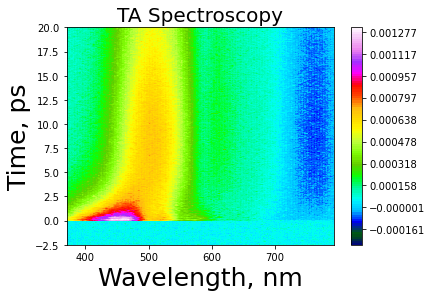

In [15]:
cmap = plt.get_cmap('gist_ncar')
set_cmap(cmap)
levels = linspace(-0.000273112629303816,0.00130881625733123,100)
contourf(x,y,all_row,levels=levels)
colorbar()

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Time, ps', fontsize = 25)
#colorbar.label('dT/T')
title('TA Spectroscopy', fontsize = 20)


Text(0.5, 1.0, 'dT/T versus time for wavelngth 450.75 nm')

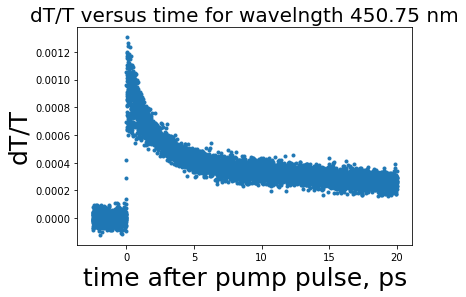

In [16]:
#wavelength[19]
plot(column,array(all_row)[:,19], linestyle ='', marker = '.')
#wavelength = 450.75 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 450.75 nm', fontsize = 20)

(0.0, 1.0)

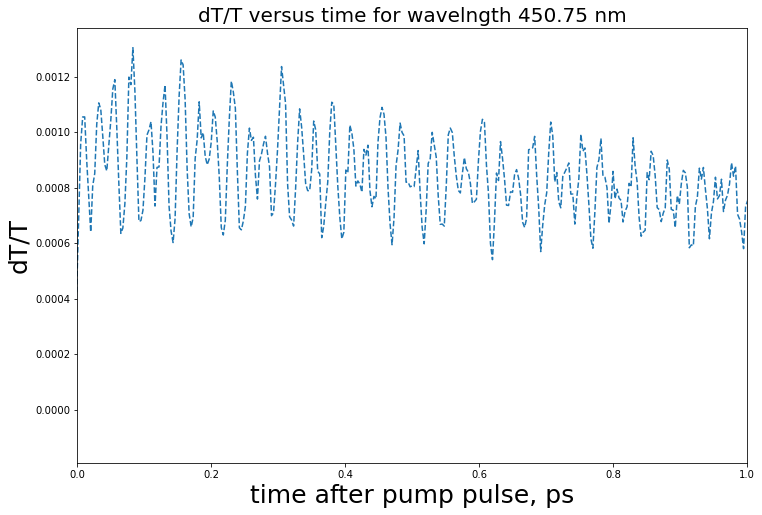

In [115]:
#wavelength[19]
plot(column,array(all_row)[:,19], linestyle ='--', marker = '')
#wavelength = 450.75 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 450.75 nm', fontsize = 20)
xlim(0,1)

In [38]:
wavelength[36]

523.0

Text(0.5, 1.0, 'dT/T versus time for wavelngth 523 nm')

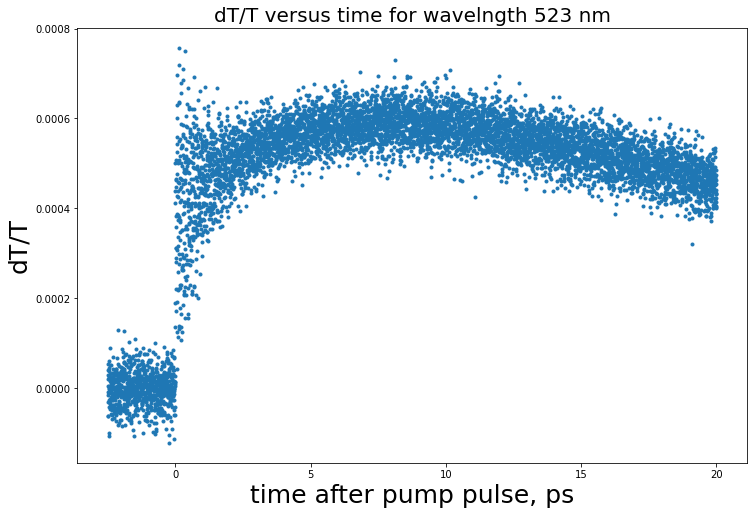

In [39]:
#wavelength[19]
plot(column,array(all_row)[:,36], linestyle ='', marker = '.')
#wavelength = 540 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 523 nm', fontsize = 20)

In [43]:
wavelength[94]

769.5

Text(0.5, 1.0, 'dT/T versus time for wavelngth 769.5 nm')

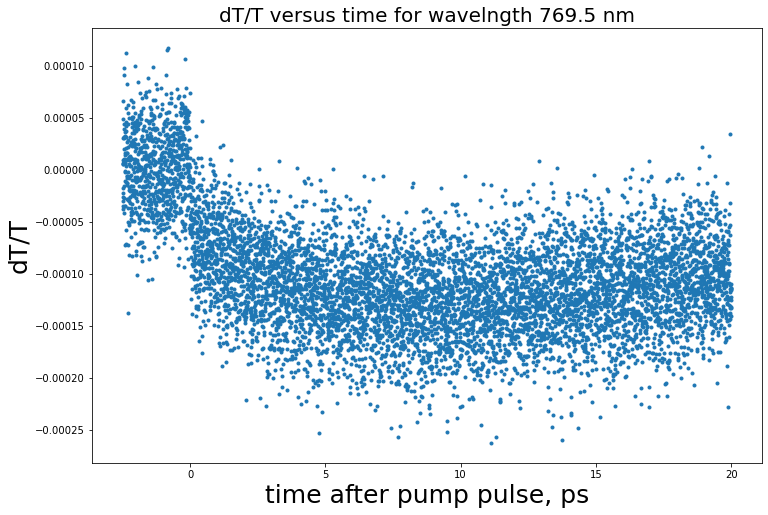

In [44]:
#wavelength[19]
plot(column,array(all_row)[:,94], linestyle ='', marker = '.')
#wavelength = 701.5 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 769.5 nm', fontsize = 20)

In [23]:
plt.rcParams['figure.figsize'] = [12, 8]

In [29]:
column[3500]

[8.0]

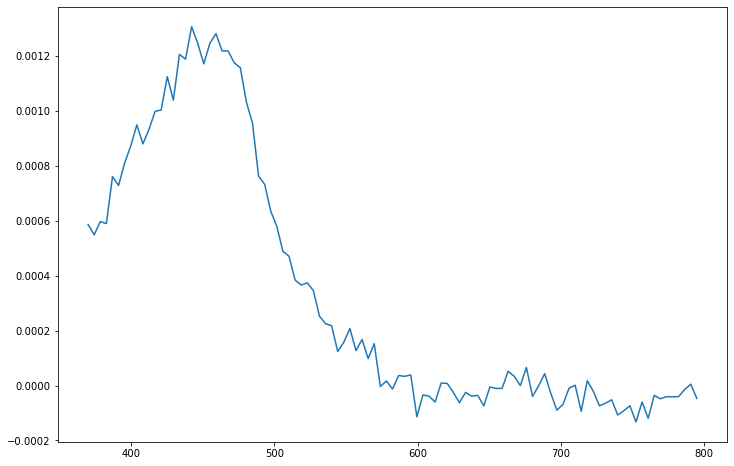

In [24]:
plot(wavelength,all_row[860])
#excitation t = 0.08ps

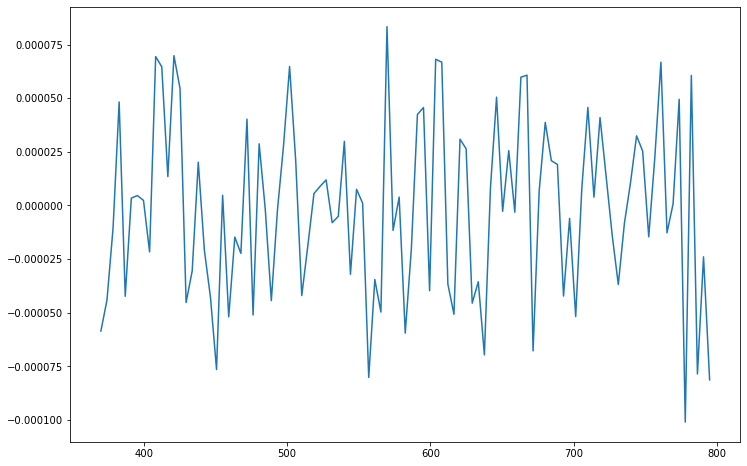

In [25]:
plot(wavelength,all_row[700])
#excitation t = -0.4ps

In [54]:
column[834]

[0.00200000000000022]

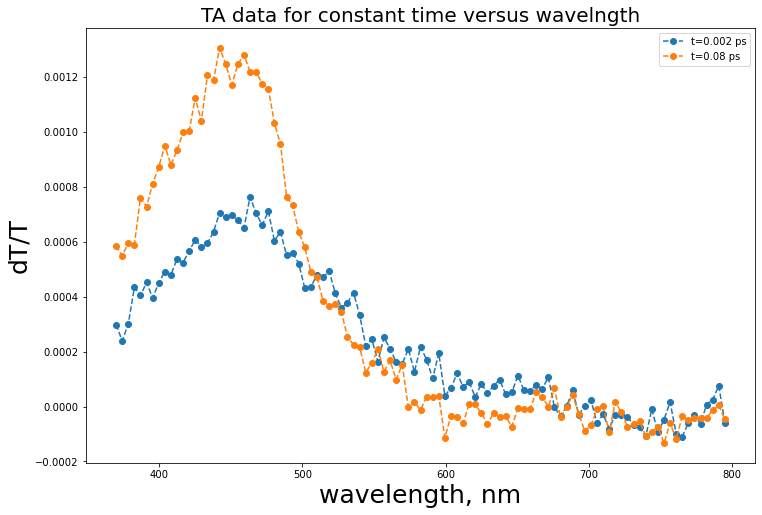

In [56]:
#plot(wavelength, all_row[700], marker = 'o', linestyle = '--', label = 't=-0.4 ps')
plot(wavelength,all_row[834], marker = 'o', linestyle = '--', label = 't=0.002 ps')
plot(wavelength,all_row[860], marker = 'o', linestyle = '--', label = 't=0.08 ps')
#plot(wavelength,all_row[3500], marker = 'o', linestyle = '--', label = 't=8 ps')
xlabel('wavelength, nm', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('TA data for constant time versus wavelngth', fontsize = 20)
#excitation t = 8 and 0.08ps
legend()

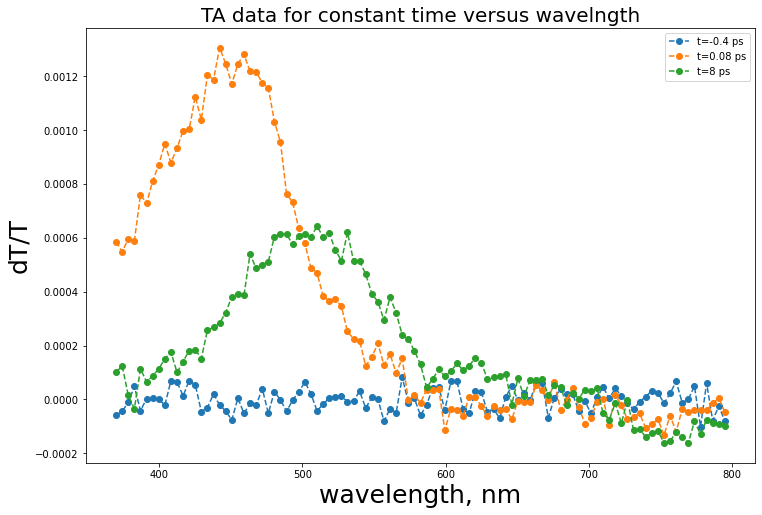

In [36]:
plot(wavelength, all_row[700], marker = 'o', linestyle = '--', label = 't=-0.4 ps')
plot(wavelength,all_row[860], marker = 'o', linestyle = '--', label = 't=0.08 ps')

plot(wavelength,all_row[3500], marker = 'o', linestyle = '--', label = 't=8 ps')
xlabel('wavelength, nm', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('TA data for constant time versus wavelngth', fontsize = 20)
#excitation t = 8 and 0.08ps
legend()

In [70]:
column[1100]

[0.8]

(-0.0002, 0.0002)

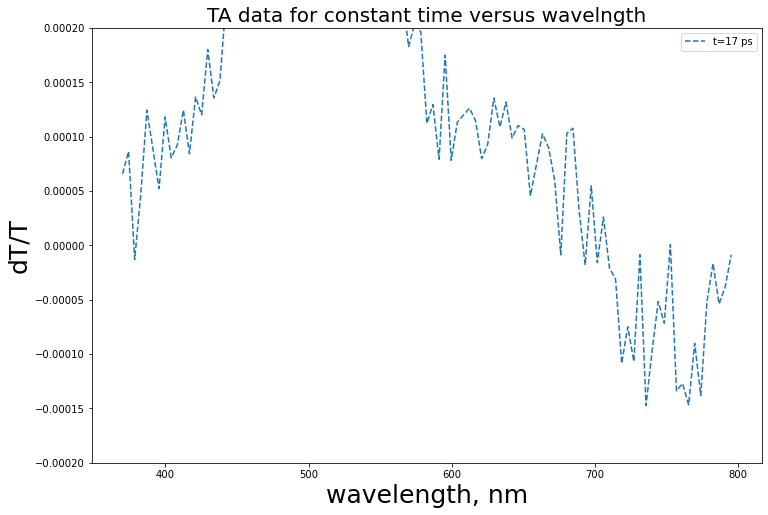

In [134]:
#plot(wavelength,all_row[860], linestyle = '--', label = 't=0.08 ps')
#plot(wavelength,all_row[1100], linestyle = '--', label = 't=0.8 ps')
#plot(wavelength,all_row[1500],  linestyle = '--', label = 't=2 ps')
#plot(wavelength,all_row[3500], linestyle = '--', label = 't=8 ps')
plot(wavelength,all_row[6500], linestyle = '--', label = 't=17 ps')
xlabel('wavelength, nm', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('TA data for constant time versus wavelngth', fontsize = 20)
#excitation t = 8 and 0.08ps
legend()
ylim(-0.0002,0.0002)

In [ ]:
plot(wavelength,all_row[5000])
plot(wavelength,all_row[5000])

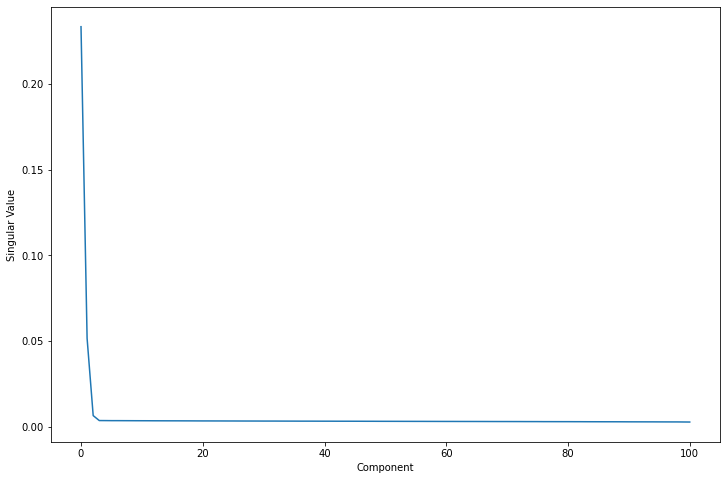

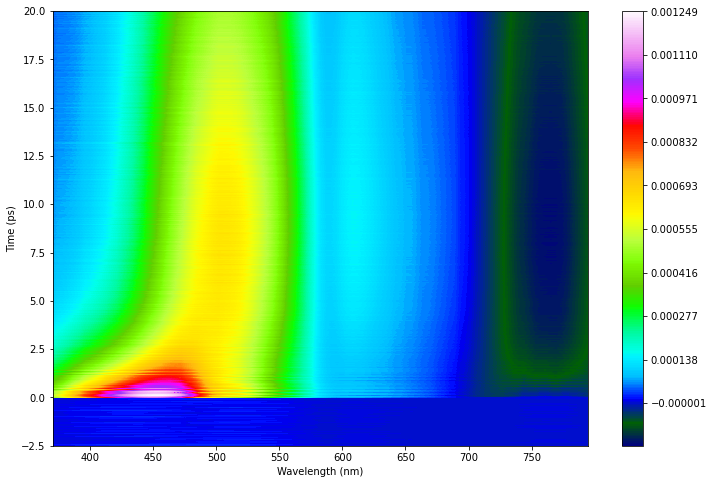

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = all_row

# Center the data
mean_data = np.mean(data, axis=0)
centered_data = data - mean_data

# Perform SVD
U, s, Vt = np.linalg.svd(all_row)
S = np.diag(s)

# Plot the singular values
plt.plot(s)
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.show()

# Choose a number of components to retain
n_components = 2

# Reconstruct the data using the retained components
U_reduced = U[:, :n_components]
S_reduced = S[:n_components, :n_components]
Vt_reduced = Vt[:n_components, :]
reconstructed_data = U_reduced @ S_reduced @ Vt_reduced
levels = linspace(-0.00013658094550707877,0.0012499329647849937,1000)
# Plot the reconstructed data
#plt.imshow(wavelength,column,reconstructed_data, cmap='jet', aspect='auto')
contourf(x,y,reconstructed_data,levels=levels)
colorbar()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (ps)')
plt.show()

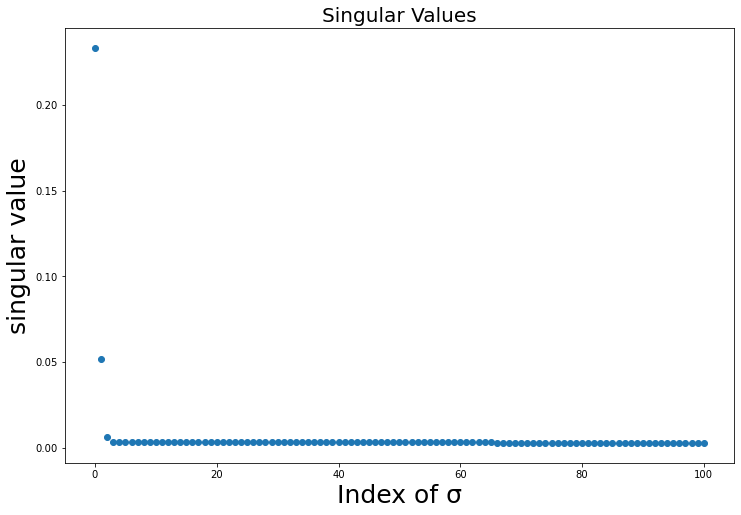

In [103]:
s_nor = s/sum(s)
s_nor = s_nor*100
s_nor
plot(s, marker = 'o', linestyle = '')
title('Singular Values', fontsize = 20)
plt.xlabel('Index of σ', fontsize = 25)
plt.ylabel('singular value', fontsize = 25)
plt.show()

Text(0.5, 0, 'time, ps')

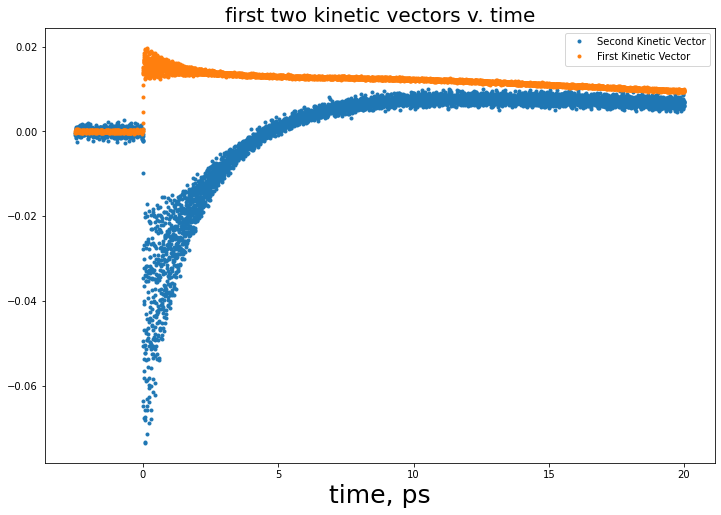

In [83]:
#plot(column,U_reduced[:,0], marker = '.', linestyle = '',label = 'First Kinetic Vector')
plot(column,U_reduced[:,1], marker = '.', linestyle = '',label = 'Second Kinetic Vector')
plot(column,U_reduced[:,0], marker = '.', linestyle = '',label = 'First Kinetic Vector')
legend()
title('first two kinetic vectors v. time', fontsize = 20)

plt.xlabel('time, ps', fontsize = 25)

Text(0.5, 0, 'time, ps')

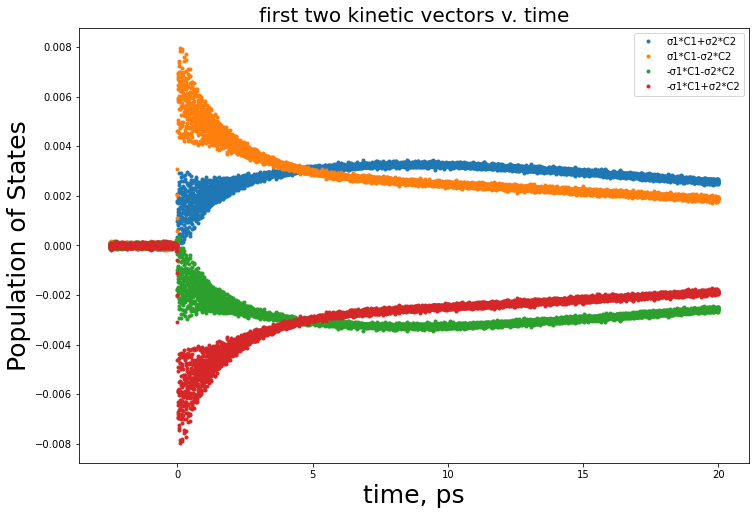

In [95]:
plot(column,s[0]*U_reduced[:,0]+s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1+σ2*C2')
plot(column,s[0]*U_reduced[:,0]-s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1-σ2*C2')
plot(column,-s[0]*U_reduced[:,0]-s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = '-σ1*C1-σ2*C2')
plot(column,-s[0]*U_reduced[:,0]+s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = '-σ1*C1+σ2*C2')

#plot(column,U_reduced[:,1], marker = '.', linestyle = '',label = 'Second Kinetic Vector')
#plot(column,U_reduced[:,0], marker = '.', linestyle = '',label = 'First Kinetic Vector')

legend()
title('first two kinetic vectors v. time', fontsize = 20)
plt.ylabel('Population of States', fontsize = 25)
plt.xlabel('time, ps', fontsize = 25)

Text(0.5, 0, 'time, ps')

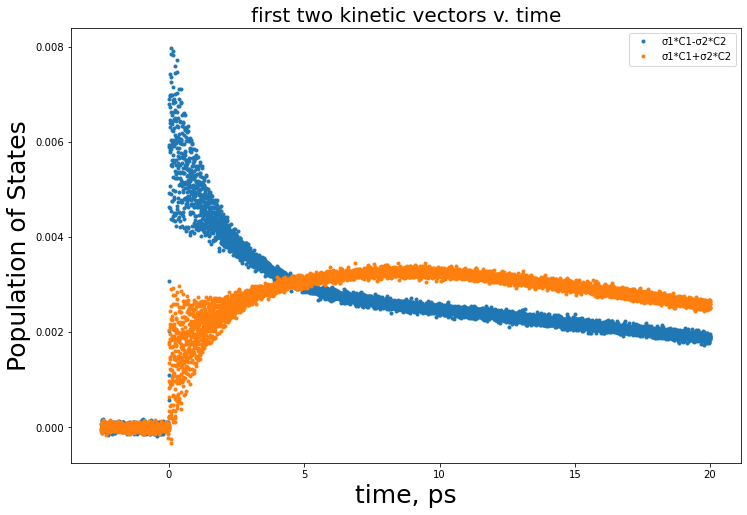

In [98]:
plot(column,s[0]*U_reduced[:,0]-s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1-σ2*C2')
plot(column,s[0]*U_reduced[:,0]+s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1+σ2*C2')

#plot(column,-s[0]*U_reduced[:,1]-s[1]*U_reduced[:,0], marker = '.', linestyle = '',label = '-σ1*C1-σ2*C2')
#plot(column,-s[0]*U_reduced[:,0]+s[1]*U_reduced[:,0], marker = '.', linestyle = '',label = '-σ1*C1+σ2*C2')

legend()
title('first two kinetic vectors v. time', fontsize = 20)
plt.ylabel('Population of States', fontsize = 25)
plt.xlabel('time, ps', fontsize = 25)

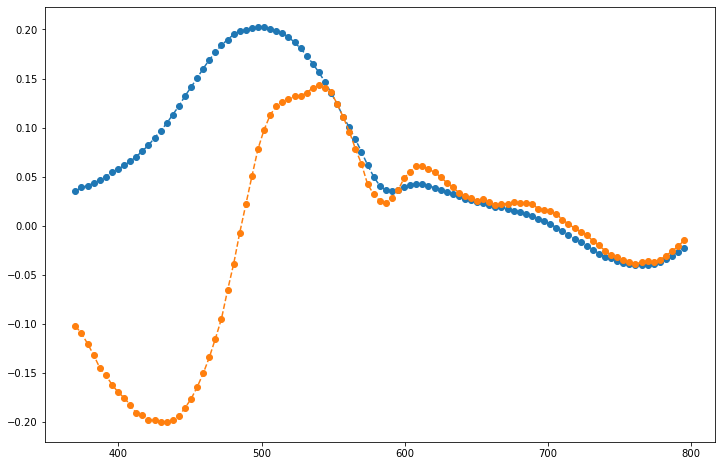

In [99]:
plot(wavelength,Vt[0],marker = 'o', linestyle ='--')
plot(wavelength,Vt[1],marker = 'o', linestyle ='--')


Text(0.5, 0, 'wavelength, nm')

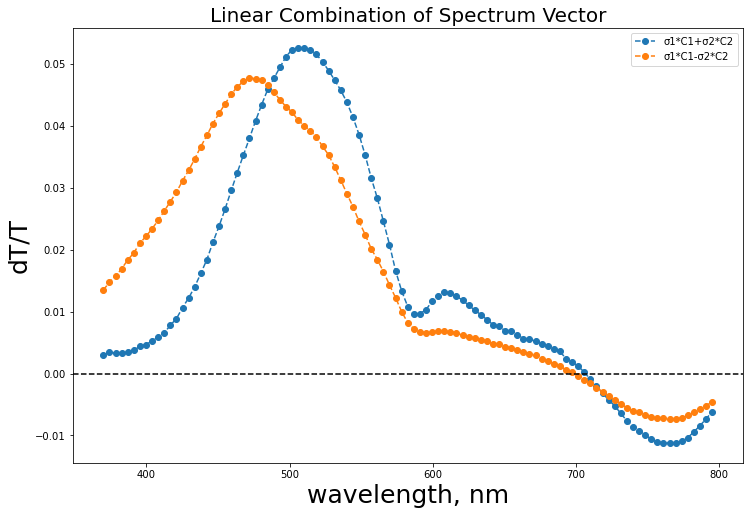

In [110]:
plot(wavelength,s[0]*Vt[0]+s[1]*Vt[1],marker = 'o', linestyle ='--',label = 'σ1*C1+σ2*C2')
plot(wavelength,s[0]*Vt[0]-s[1]*Vt[1],marker = 'o', linestyle ='--',label = 'σ1*C1-σ2*C2')
#plot(wavelength,-s[0]*Vt[0]+s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1+σ2*C2')
#plot(wavelength,-s[0]*Vt[0]-s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1-σ2*C2')
legend()
axhline(y = 0, color = 'black', linestyle = '--')
title('Linear Combination of Spectrum Vector', fontsize = 20)
plt.ylabel('dT/T', fontsize = 25)
plt.xlabel('wavelength, nm', fontsize = 25)

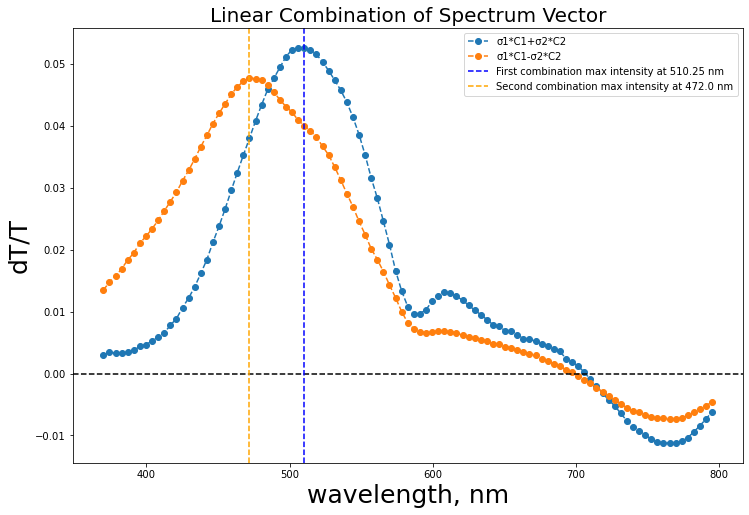

In [128]:
lista = (s[0]*Vt[0]+s[1]*Vt[1]).tolist()
listb = (s[0]*Vt[0]-s[1]*Vt[1]).tolist()
plot(wavelength,lista,marker = 'o', linestyle ='--',label = 'σ1*C1+σ2*C2')
plot(wavelength,listb,marker = 'o', linestyle ='--',label = 'σ1*C1-σ2*C2')
#plot(wavelength,-s[0]*Vt[0]+s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1+σ2*C2')
#plot(wavelength,-s[0]*Vt[0]-s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1-σ2*C2')

axhline(y = 0, color = 'black', linestyle = '--')
title('Linear Combination of Spectrum Vector', fontsize = 20)
plt.ylabel('dT/T', fontsize = 25)
plt.xlabel('wavelength, nm', fontsize = 25)

a = lista.index(max(lista))
#tx2 = 'Second max Emission Absorbance for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
tx = 'First combination max intensity at '+str(wavelength[a])+ ' nm'
axvline(wavelength[a], color = 'blue', linestyle ='--', label = tx)


b = listb.index(max(listb))
tx2 = 'Second combination max intensity at '+str(wavelength[b])+ ' nm'
axvline(wavelength[b], color = 'orange', linestyle ='--', label = tx2)

legend()

(0.0, 1.0)

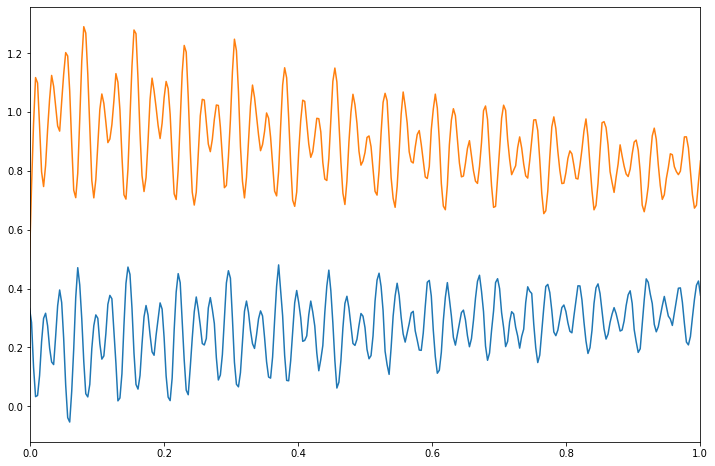

In [112]:
plot(column,37.74082104*U[:,0]+8.36303833*U[:,1])
plot(column,37.74082104*U[:,0]-8.36303833*U[:,1])
xlim(0, 1)

In [ ]:
time = column
intensity = data[:, 1]

# Perform Fourier transform on the intensity data
fft = np.fft.fft(intensity)

# Calculate the frequencies corresponding to the Fourier transform
freq = np.fft.fftfreq(len(intensity), time[1]-time[0])

# Plot the FTIR spectrum
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.show()